In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
from PerceptronScratch import SinglePerceptron

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, (2, 3)]

y = (iris.target == 0).astype(int)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.15,
    random_state=42,
    stratify=y_train
)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
myModel = SinglePerceptron(
    n_features=2,
    learning_rate=0.01,
    epochs=100,
    random_state=42
)

myModel.fit(X_train, y_train, X_val, y_val)

SINGLE PERCEPTRON (SCRATCH):
---------------------------------------------------------------------
  Features : 2
  Train : 102 samples
  Val: 18 samples
  Learning Rate: 0.01  | Epochs : 100
  Epoch    1/100  |  accuracy: 0.9216  |  loss: 0.7276  |  val_accuracy: 0.8333  |  val_loss: 0.5066
  Epoch    2/100  |  accuracy: 0.9216  |  loss: 0.7281  |  val_accuracy: 0.8333  |  val_loss: 0.5044
  Epoch    3/100  |  accuracy: 0.9216  |  loss: 0.7286  |  val_accuracy: 0.8333  |  val_loss: 0.5022
  Epoch    4/100  |  accuracy: 0.9216  |  loss: 0.7290  |  val_accuracy: 0.8333  |  val_loss: 0.4999
  Epoch    5/100  |  accuracy: 0.9216  |  loss: 0.7295  |  val_accuracy: 0.8889  |  val_loss: 0.4978
  Epoch    6/100  |  accuracy: 0.9216  |  loss: 0.7300  |  val_accuracy: 0.8889  |  val_loss: 0.4956
  Epoch    7/100  |  accuracy: 0.9216  |  loss: 0.7305  |  val_accuracy: 0.8889  |  val_loss: 0.4934
  Epoch    8/100  |  accuracy: 0.9216  |  loss: 0.7310  |  val_accuracy: 0.8889  |  val_loss: 0.4913


In [20]:
print("My Model Weights:")
print("W:", myModel.W.flatten())
print("b:", myModel.b)

print("\nSklearn Logistic Regression Weights:")
print("W:", sk_model.coef_.flatten())
print("b:", sk_model.intercept_)

My Model Weights:
W: [-0.04548935 -0.97388919]
b: [[-0.14969735]]

Sklearn Logistic Regression Weights:
W: [-2.26595447 -2.02543779]
b: [-2.47083297]


In [21]:
def plot_boundary(model, X, y, scaler=None, sklearn=False):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid
    
    if sklearn:
        Z = model.predict(grid_scaled)
    else:
        Z = model.predict(grid_scaled)
        
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

Text(0.5, 1.0, 'My Logistic Regression (Scratch)')

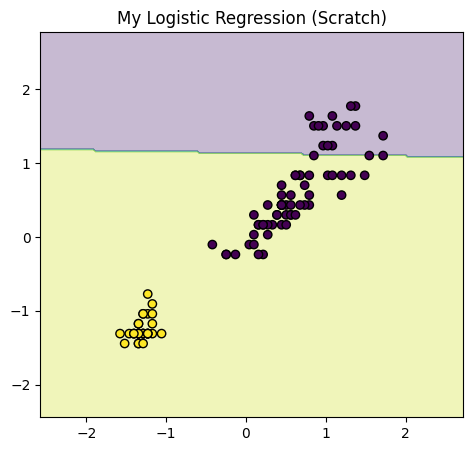

In [22]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_boundary(myModel, X_train, y_train, scaler=scaler)
plt.title("My Logistic Regression (Scratch)")

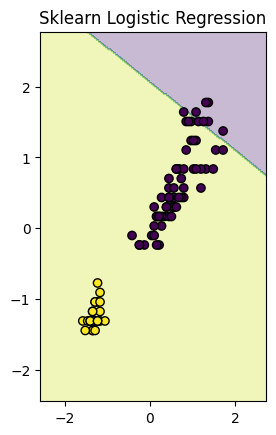

In [23]:
plt.subplot(1,2,2)
plot_boundary(sk_model, X_train, y_train, scaler=scaler, sklearn=True)
plt.title("Sklearn Logistic Regression")

plt.show()

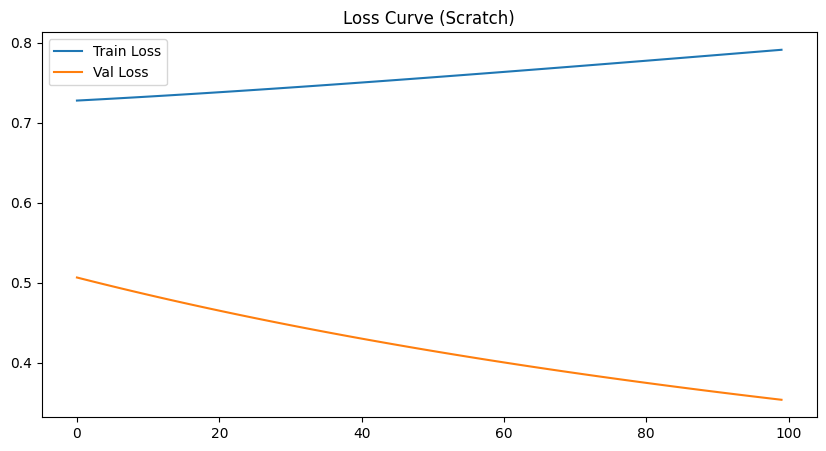

In [24]:
plt.figure(figsize=(10,5))
plt.plot(myModel.history["loss"], label="Train Loss")
plt.plot(myModel.history["val_loss"], label="Val Loss")
plt.title("Loss Curve (Scratch)")
plt.legend()
plt.show()


In [25]:
print("My Model Train Acc:", myModel.accuracy(X_train, y_train))
print("My Model Test Acc:", myModel.accuracy(X_test, y_test))

print("Sklearn Train Acc:", sk_model.score(X_train, y_train))
print("Sklearn Test Acc:", sk_model.score(X_test, y_test))

My Model Train Acc: 0.9509803921568627
My Model Test Acc: 0.9666666666666667
Sklearn Train Acc: 1.0
Sklearn Test Acc: 1.0


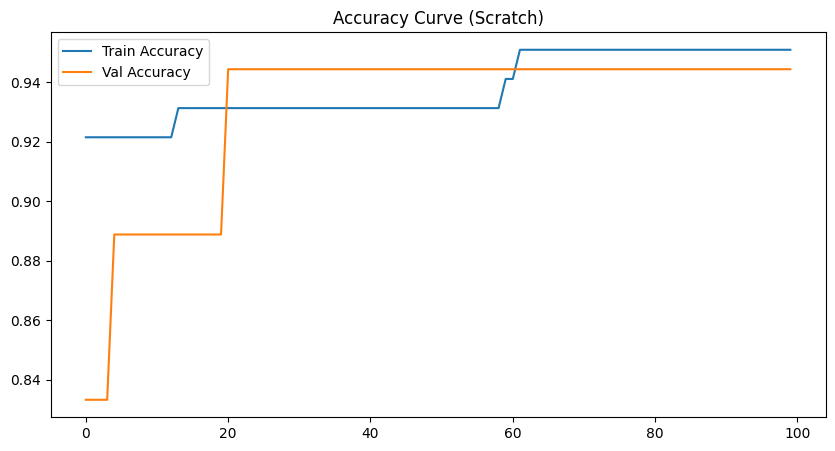

In [26]:
plt.figure(figsize=(10,5))
plt.plot(myModel.history["acc"], label="Train Accuracy")
plt.plot(myModel.history["val_acc"], label="Val Accuracy")
plt.title("Accuracy Curve (Scratch)")
plt.legend()
plt.show()